In [36]:
!pip install tensorflow

In [37]:
pip install tensorflow_datasets

Note: you may need to restart the kernel to use updated packages.


In [38]:
#install the required libraries
import numpy as np
import pandas as pd
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.metrics import classification_report
import shutil
import pathlib
import matplotlib.pyplot as plt

In [39]:
#check Tensorflow version
print(tf.__version__)

2.16.1


Read and process the annotations.csv file

In [40]:
# Load annotation CSV file
csv_file_train = "C:/Users/nsinh/Documents/NidhiMSIT/SpringSem2024/IT7071C-ML&DM/Project/Jaywalking Detection.v1i.tensorflow/train/_annotations.csv"
csv_file_val = "C:/Users/nsinh/Documents/NidhiMSIT/SpringSem2024/IT7071C-ML&DM/Project/Jaywalking Detection.v1i.tensorflow/valid/_annotations.csv"
df_train = pd.read_csv(csv_file_train)
df_val = pd.read_csv(csv_file_val)

# Display the first few rows of the DataFrame
print(df_train.head())
print(df_val.head())

# Extract image filenames and class labels
image_filenames_train = df_train['filename'].tolist()
class_labels_train = df_train['class'].tolist()

image_filenames_val = df_val['filename'].tolist()
class_labels_val = df_val['class'].tolist()

# Print the total number of images
print(f"Total number of images in training dataset: {len(image_filenames_train)}")
print(f"Total number of images in validation dataset: {len(image_filenames_val)}")

# Print the distribution of class labels
print("Class distribution for training:")
print(df_train['class'].value_counts())

print("Class distribution for validation:")
print(df_val['class'].value_counts())

                                            filename  width  height  \
0  video4_mp4-26_jpg.rf.9e454dfc68ae87e6dc894ad7c...    640     640   
1  video4_mp4-26_jpg.rf.9e454dfc68ae87e6dc894ad7c...    640     640   
2  video4_mp4-26_jpg.rf.9e454dfc68ae87e6dc894ad7c...    640     640   
3  video4_mp4-26_jpg.rf.9e454dfc68ae87e6dc894ad7c...    640     640   
4  video4_mp4-26_jpg.rf.9e454dfc68ae87e6dc894ad7c...    640     640   

       class  xmin  ymin  xmax  ymax  
0  jaywalker   278   283   288   345  
1  jaywalker   296   280   310   347  
2  jaywalker   303   294   311   364  
3  jaywalker   309   287   319   352  
4  jaywalker   319   290   332   370  
                                            filename  width  height  \
0  video4_mp4-19_jpg.rf.0620fe33abc7394a46d6e005d...    640     640   
1  video4_mp4-19_jpg.rf.0620fe33abc7394a46d6e005d...    640     640   
2  video4_mp4-19_jpg.rf.0620fe33abc7394a46d6e005d...    640     640   
3  video4_mp4-19_jpg.rf.0620fe33abc7394a46d6e005d...   

classify the images into jaywalker and non-jaywalker and organize them into different folders for training:

In [41]:
# Define paths for training
input_dir = 'C:/Users/nsinh/Documents/NidhiMSIT/SpringSem2024/IT7071C-ML&DM/Project/Jaywalking Detection.v1i.tensorflow/train'  # Directory containing the images
output_dir_jaywalker = 'C:/Users/nsinh/Documents/NidhiMSIT/SpringSem2024/IT7071C-ML&DM/Project/Jaywalking Detection.v1i.tensorflow/train/jaywalker/'  # Directory for jaywalker images
output_dir_non_jaywalker = 'C:/Users/nsinh/Documents/NidhiMSIT/SpringSem2024/IT7071C-ML&DM/Project/Jaywalking Detection.v1i.tensorflow/train/non_jaywalker/'  # Directory for non-jaywalker images

# Create output directories if they don't exist
os.makedirs(output_dir_jaywalker, exist_ok=True)
os.makedirs(output_dir_non_jaywalker, exist_ok=True)

# Loop through each image and its class label
for filename, class_label in zip(image_filenames_train, class_labels_train):
    # Construct source and destination paths
    src_path = os.path.join(input_dir, filename)
    if class_label == 'jaywalker':
        dest_path = os.path.join(output_dir_jaywalker, filename)
    else:
        dest_path = os.path.join(output_dir_non_jaywalker, filename)
    
    # Copy the image to the appropriate folder
    shutil.copyfile(src_path, dest_path)

print("Images classified and saved into respective folders.")


Images classified and saved into respective folders.


Classify the into jaywalker and non-jaywalker and organize them into different folders for validation:

In [42]:
# Define paths for validation
input_dir = 'C:/Users/nsinh/Documents/NidhiMSIT/SpringSem2024/IT7071C-ML&DM/Project/Jaywalking Detection.v1i.tensorflow/valid'  # Directory containing the images
output_dir_jaywalker = 'C:/Users/nsinh/Documents/NidhiMSIT/SpringSem2024/IT7071C-ML&DM/Project/Jaywalking Detection.v1i.tensorflow/valid/jaywalker/'  # Directory for jaywalker images
output_dir_non_jaywalker = 'C:/Users/nsinh/Documents/NidhiMSIT/SpringSem2024/IT7071C-ML&DM/Project/Jaywalking Detection.v1i.tensorflow/valid/non_jaywalker/'  # Directory for non-jaywalker images

# Create output directories if they don't exist
os.makedirs(output_dir_jaywalker, exist_ok=True)
os.makedirs(output_dir_non_jaywalker, exist_ok=True)

# Loop through each image and its class label
for filename, class_label in zip(image_filenames_val, class_labels_val):
    # Construct source and destination paths
    src_path = os.path.join(input_dir, filename)
    if class_label == 'jaywalker':
        dest_path = os.path.join(output_dir_jaywalker, filename)
    else:
        dest_path = os.path.join(output_dir_non_jaywalker, filename)
    
    # Copy the image to the appropriate folder
    shutil.copyfile(src_path, dest_path)

print("Images classified and saved into respective folders.")


Images classified and saved into respective folders.


In [43]:
# define the directories for train and valid datasets
train_ds_dir = pathlib.Path("C:/Users/nsinh/Documents/NidhiMSIT/SpringSem2024/IT7071C-ML&DM/Project/Jaywalking Detection.v1i.tensorflow/train").with_suffix('')
val_ds_dir = pathlib.Path("C:/Users/nsinh/Documents/NidhiMSIT/SpringSem2024/IT7071C-ML&DM/Project/Jaywalking Detection.v1i.tensorflow/valid").with_suffix('')

Data Preprocessing

In [44]:
#make sure the image size are consistent changing the image height and width to 180*180 pixel
batch_size = 32
img_height = 180
img_width = 180

In [45]:
#convert the directories to dataset using tensorflow keras library
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_ds_dir,
  validation_split=None,
  subset=None,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 691 files belonging to 2 classes.


In [46]:
#convert the directories to dataset using tensorflow keras library
val_ds = tf.keras.utils.image_dataset_from_directory(
  val_ds_dir,
  validation_split=None,
  subset=None,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 111 files belonging to 2 classes.


In [47]:
#check the class names
class_names_train = train_ds.class_names
class_names_val = val_ds.class_names
print('List of all the classes present in the training dataset:',class_names_train)
print('List of all the classes present in the validation dataset:',class_names_val)

List of all the classes present in the training dataset: ['jaywalker', 'non_jaywalker']
List of all the classes present in the validation dataset: ['jaywalker', 'non_jaywalker']


Data Visualization

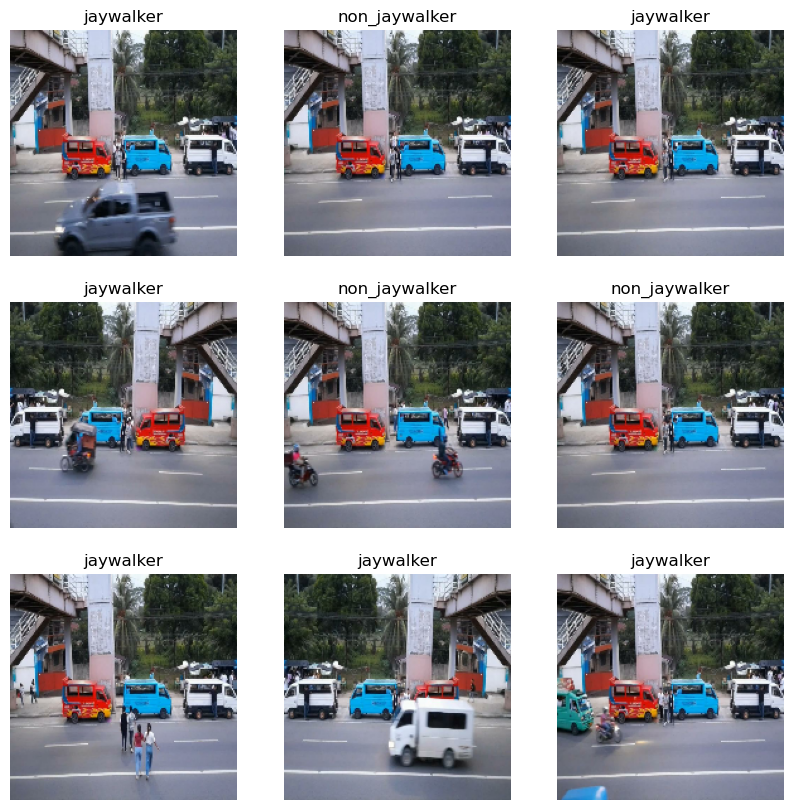

In [48]:
#below is the datas visualization for training jaywalkers dataset

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names_train[labels[i]])
    plt.axis("off")

In [49]:
#checking the shapes of images
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [50]:
#Rescaling 
normalization_layer = tf.keras.layers.Rescaling(1./255)

Normalization

In [51]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [52]:
#Autotuning for optimization
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [53]:
#building the model using cov2d,maxpooling,flatten,dense
num_classes = 2

model_CNN = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [54]:
#build the cnn model
model_CNN.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [55]:
#fit/train the cnn model
history=model_CNN.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 182ms/step - accuracy: 0.5167 - loss: 0.7158 - val_accuracy: 0.5045 - val_loss: 0.6934
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 155ms/step - accuracy: 0.4976 - loss: 0.6932 - val_accuracy: 0.5045 - val_loss: 0.6934
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 155ms/step - accuracy: 0.4976 - loss: 0.6933 - val_accuracy: 0.5045 - val_loss: 0.6935
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step - accuracy: 0.4976 - loss: 0.6933 - val_accuracy: 0.5045 - val_loss: 0.6935
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - accuracy: 0.4976 - loss: 0.6933 - val_accuracy: 0.5045 - val_loss: 0.6936
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - accuracy: 0.4976 - loss: 0.6933 - val_accuracy: 0.5045 - val_loss: 0.6936
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step - accuracy: 0.4976 - loss: 0.6933 - val_accuracy: 0.5045 - val_loss: 0.6936
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 155ms/step - accuracy: 0.4976 - loss: 0.6933 - val_accuracy: 0.

Evaluation

In [56]:
#define the test directory
test_ds_dir = pathlib.Path("C:/Users/nsinh/Documents/NidhiMSIT/SpringSem2024/IT7071C-ML&DM/Project/Jaywalking Detection.v1i.tensorflow/test").with_suffix('')

In [57]:
# Load annotation CSV file for test data
csv_file = 'C:/Users/nsinh/Documents/NidhiMSIT/SpringSem2024/IT7071C-ML&DM/Project/Jaywalking Detection.v1i.tensorflow/test/_annotations.csv'
df = pd.read_csv(csv_file)

# Display the first few rows of the DataFrame
print(df.head())

# Extract image filenames and class labels
image_filenames = df['filename'].tolist()
class_labels = df['class'].tolist()

# Print the total number of images
print(f"Total number of images: {len(image_filenames)}")

# Print the distribution of class labels
print("Class distribution:")
print(df['class'].value_counts())


                                            filename  width  height  \
0  video4_mp4-92_jpg.rf.541845f9024f58c3fd0f815ca...    640     640   
1  video4_mp4-92_jpg.rf.541845f9024f58c3fd0f815ca...    640     640   
2  video4_mp4-92_jpg.rf.541845f9024f58c3fd0f815ca...    640     640   
3  video4_mp4-92_jpg.rf.541845f9024f58c3fd0f815ca...    640     640   
4  video4_mp4-92_jpg.rf.541845f9024f58c3fd0f815ca...    640     640   

       class  xmin  ymin  xmax  ymax  
0  jaywalker   331   444   365   623  
1  jaywalker   359   455   391   640  
2  jaywalker   368   381   400   506  
3  jaywalker   396   395   424   553  
4  jaywalker   422   391   447   523  
Total number of images: 266
Class distribution:
class
jaywalker        145
non-jaywalker    121
Name: count, dtype: int64


In [58]:
# Define paths for test
input_dir = 'C:/Users/nsinh/Documents/NidhiMSIT/SpringSem2024/IT7071C-ML&DM/Project/Jaywalking Detection.v1i.tensorflow/test'  # Directory containing the images
output_dir_jaywalker = 'C:/Users/nsinh/Documents/NidhiMSIT/SpringSem2024/IT7071C-ML&DM/Project/Jaywalking Detection.v1i.tensorflow/test/jaywalker/'  # Directory for jaywalker images
output_dir_non_jaywalker = 'C:/Users/nsinh/Documents/NidhiMSIT/SpringSem2024/IT7071C-ML&DM/Project/Jaywalking Detection.v1i.tensorflow/test/non_jaywalker/'  # Directory for non-jaywalker images

# Create output directories if they don't exist
os.makedirs(output_dir_jaywalker, exist_ok=True)
os.makedirs(output_dir_non_jaywalker, exist_ok=True)

# Loop through each image and its class label
for filename, class_label in zip(image_filenames, class_labels):
    # Construct source and destination paths
    src_path = os.path.join(input_dir, filename)
    if class_label == 'jaywalker':
        dest_path = os.path.join(output_dir_jaywalker, filename)
    else:
        dest_path = os.path.join(output_dir_non_jaywalker, filename)
    
    # Copy the image to the appropriate folder
    shutil.copyfile(src_path, dest_path)

print("Images classified and saved into respective folders.")


Images classified and saved into respective folders.


In [59]:
#convert test directory to test data
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_ds_dir,
  validation_split=None,
  subset=None,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 59 files belonging to 2 classes.


In [60]:
#print the classes
class_names_test = test_ds.class_names
print('List of all the classes present in the testing dataset:',class_names_test)

List of all the classes present in the testing dataset: ['jaywalker', 'non_jaywalker']


In [61]:
#Evaluate the model
test_loss_CNN, test_acc_CNN = model_CNN.evaluate(test_ds, verbose=2)
print('\nTest accuracy:', test_acc_CNN)

2/2 - 0s - 168ms/step - accuracy: 0.4915 - loss: 0.6937

Test accuracy: 0.49152541160583496


In [62]:
# Get the true labels from the test dataset
true_labels = []
for images, labels in test_ds:
    true_labels.extend(labels.numpy())

# Get the predicted labels using your model
predicted_probs = model_CNN.predict(test_ds)
predicted_labels = np.argmax(predicted_probs, axis=1)

# Generate the classification report
report_CNN = classification_report(true_labels, predicted_labels)

print(report_CNN)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.49      1.00      0.66        29

    accuracy                           0.49        59
   macro avg       0.25      0.50      0.33        59
weighted avg       0.24      0.49      0.32        59



C:\Users\nsinh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nsinh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nsinh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As we can see that we have received an accuracy of 49% through CNN model.
This accuracy is not as good as we want so we will try another model.
Now we will se SVM model and check what is the accuracy there.


In [63]:
#import all the required libraries for Ensemble model
from skimage.transform import resize 
from skimage.io import imread 
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [64]:
#loading and preprocessing the images
Categories=['jaywalker','non_jaywalker'] 
flat_data_arr=[] #input array 
target_arr=[] #output array 
datadir='C:/Users/nsinh/Documents/NidhiMSIT/SpringSem2024/IT7071C-ML&DM/Project/Jaywalking Detection.v1i.tensorflow/train'
#path which contains all the categories of images 
for i in Categories:
    print(f'loading... category : {i}') 
    path=os.path.join(datadir,i) 
    for img in os.listdir(path): 
        img_array=imread(os.path.join(path,img)) 
        img_resized=resize(img_array,(150,150,3)) 
        flat_data_arr.append(img_resized.flatten()) 
        target_arr.append(Categories.index(i)) 
    print(f'loaded category:{i} successfully') 
flat_data=np.array(flat_data_arr) 
target=np.array(target_arr)

loading... category : jaywalker
loaded category:jaywalker successfully
loading... category : non_jaywalker
loaded category:non_jaywalker successfully


In [65]:
#check dataframe size
df_ens=pd.DataFrame(flat_data) 
df_ens['Target']=target 
df_ens.shape

(691, 67501)

In [66]:
#divide input data 
x=df_ens.iloc[:,:-1] 
#divide output data 
y=df_ens.iloc[:,-1]

In [67]:
# Splitting the data into training 80% and testing 20% sets 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=77, stratify=y) 

In [68]:
# Define individual classifiers
svm_clf = SVC(kernel='linear', probability=False)
dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [69]:
# Create an ensemble of classifiers
ensemble_clf = VotingClassifier(estimators=[('svm', svm_clf), ('dt', dt_clf), ('rf', rf_clf)], voting='hard')

In [70]:
# Train the ensemble model
ensemble_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('svm', SVC(kernel='linear')),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42))])

In [71]:
# Make predictions
y_pred_ens = ensemble_clf.predict(x_test)

In [72]:
# Calculate accuracy
accuracy_ens = accuracy_score(y_test, y_pred_ens)
print("Accuracy:", accuracy_ens)

Accuracy: 0.23741007194244604


In [73]:
#generate classification report
report_ens = classification_report(y_test, y_pred_ens)

print("Classification Report:")
print(report_ens)

Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.34      0.30        68
           1       0.18      0.14      0.16        71

    accuracy                           0.24       139
   macro avg       0.23      0.24      0.23       139
weighted avg       0.23      0.24      0.23       139



We can see that we have received an accuracy of 24%.
Now we will try a tensorflow keras pre-trained library VGG16.

In [74]:
!pip install scikit-image

In [75]:
#load libraries
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [76]:
# Define directories containing training and testing data
train_dir = 'C:/Users/nsinh/Documents/NidhiMSIT/SpringSem2024/IT7071C-ML&DM/Project/Jaywalking Detection.v1i.tensorflow/train'
test_dir = 'C:/Users/nsinh/Documents/NidhiMSIT/SpringSem2024/IT7071C-ML&DM/Project/Jaywalking Detection.v1i.tensorflow/test'

In [77]:
# Data augmentation and preprocessing for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [78]:
# Data augmentation and preprocessing for testing (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

In [79]:
# Generate batches of augmented data for training
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 691 images belonging to 2 classes.


In [80]:
# Generate batches of augmented data for testing
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 59 images belonging to 2 classes.


In [81]:
# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

In [82]:
# Freeze the convolutional base
base_model.trainable = False

In [83]:
# Create a new model on top
modelVgg = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [84]:
# Compile the model
optimizer = Adam(learning_rate=1e-4)
modelVgg.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [85]:
# Display model summary
modelVgg.summary()

# Train the model
history = modelVgg.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ ?                           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10


C:\Users\nsinh\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step - accuracy: 0.5212 - loss: 0.8152 - val_accuracy: 0.5000 - val_loss: 0.7013
Epoch 2/10
 1/21 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accuracy: 0.4375 - loss: 0.9798

C:\Users\nsinh\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.4375 - loss: 0.5132 - val_accuracy: 0.5185 - val_loss: 0.7084
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step - accuracy: 0.4427 - loss: 0.8106 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step - accuracy: 0.5625 - loss: 0.3685 - val_accuracy: 0.5312 - val_loss: 0.7678
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step - accuracy: 0.4818 - loss: 0.8056 - val_accuracy: 0.4444 - val_loss: 0.7811
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4062 - loss: 0.4568 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step - accuracy: 0.5269 - loss: 0.7322 - val_accuracy: 0.5312 - val_loss: 0.6900
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - accuracy: 0.3750 - loss: 0.4104 - val_accuracy: 0.4815 - val_loss: 0.6951
Epoch 9/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 67s 3s/step - accuracy: 0.4581 - loss: 0.7550 - val_accuracy: 0.0000e

In [92]:
# Make predictions
y_pred_Vgg = modelVgg.predict(test_generator)
y_pred_Vgg = np.where(y_pred_Vgg > 0.5, 1, 0)  # Convert probabilities to binary predictions

# Get true labels
y_true = test_generator.classes

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step


In [93]:
# Evaluate the model
test_loss_Vgg, test_acc_Vgg = modelVgg.evaluate(test_generator, verbose=2)
print('\nTest accuracy:', test_acc_Vgg)

2/2 - 4s - 2s/step - accuracy: 0.4915 - loss: 0.7284

Test accuracy: 0.49152541160583496


In [94]:
#generate classification report
reportVgg = classification_report(y_true, y_pred_Vgg)

print("Classification Report:")
print(reportVgg)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.49      1.00      0.66        29

    accuracy                           0.49        59
   macro avg       0.25      0.50      0.33        59
weighted avg       0.24      0.49      0.32        59



C:\Users\nsinh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nsinh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nsinh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Here in the above model we have received an accuracy of 49%.
Similarly if we give more data for training we can obtain better accuracy.